## Import libraries

In [119]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## Load the data

In [120]:
Dataset_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
features = ['id_number', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
         'compactness_mean', 'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
         'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
         'symmetry_worst', 'fractal_dimension_worst']
data_raw = pd.read_csv(urlopen(Dataset_URL), names = features)
data_raw.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Pre-processing

In [121]:
data = data_raw.copy()
data.set_index(['id_number'], inplace = True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.describe(include="all") # count is same for all, so there are no missing values

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Classification
### Train and test

In [122]:
feats = data.iloc[:, data.columns != 'diagnosis']
classes = data.iloc[:, data.columns == 'diagnosis']

train_data, test_data, train_class, test_class = train_test_split(feats, classes, test_size = 0.20)

# Prepare the data in the correct shape otherwise .fit will give me warnings
train_class = train_class.values.ravel()
test_class = test_class.values.ravel()

### Random Forest

In [123]:
# Hyperparameters optimization
param_grid = {
    'bootstrap': [True, False],  # method for sampling data points (with or without replacement)
    'max_depth': [2, 3, 4],  # max number of levels in each decision tree
    'max_features': ['sqrt', 'log2'],  # max number of features considered for splitting a node
    #'n_estimators': [100, 200, 300, 1000]  # number of trees in the foreset
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 10, n_jobs = 3)
grid_search.fit(train_data, train_class)
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt'}

In [124]:
# Set RF with the best parameters from the grid search
RF = RandomForestClassifier(random_state=42)
RF=grid_search.best_estimator_
RF

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features='sqrt', random_state=42)

### k-fold CV

In [125]:
n = KFold(n_splits=10)
scores = cross_val_score(RF, train_data, train_class, cv = n)

### Prediction metrics

In [126]:
class_predict = RF.predict(test_data)

In [127]:
print(classification_report(class_predict, test_class, target_names = ['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.99      0.94      0.96        71
   Malignant       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [128]:
# Mean accuracy
acc_RF = RF.score(test_data, test_class)
acc_RF

0.956140350877193

In [129]:
# AUC
prob_predict = RF.predict_proba(test_data)[:,1]
fpr, tpr, _ = roc_curve(test_class, prob_predict, pos_label = 1)

In [130]:
AUC_RF = auc(fpr, tpr)
AUC_RF

0.9920076726342711

### Feature importance

#### Best features based on Gini impurity

In [131]:
feat_importance = RF.feature_importances_

In [132]:
# Order from higher to lower
ind_feat = np.argsort(feat_importance)[::-1]

In [133]:
names = features[2:]

In [134]:
for f in range(0, ind_feat.shape[0]):
        i = f
        print("{0}. Gini Impurity of '{1}': {2:.5f}"
              .format(f + 1,
                      names[ind_feat[i]],
                      feat_importance[ind_feat[f]]))

1. Gini Impurity of 'area_worst': 0.15454
2. Gini Impurity of 'concave_points_worst': 0.13479
3. Gini Impurity of 'perimeter_worst': 0.09751
4. Gini Impurity of 'radius_worst': 0.09220
5. Gini Impurity of 'concave_points_mean': 0.08276
6. Gini Impurity of 'perimeter_mean': 0.07961
7. Gini Impurity of 'area_mean': 0.05927
8. Gini Impurity of 'concavity_mean': 0.04946
9. Gini Impurity of 'radius_mean': 0.04537
10. Gini Impurity of 'concavity_worst': 0.04018
11. Gini Impurity of 'area_se': 0.03323
12. Gini Impurity of 'texture_worst': 0.02330
13. Gini Impurity of 'compactness_worst': 0.01724
14. Gini Impurity of 'radius_se': 0.01361
15. Gini Impurity of 'texture_mean': 0.01297
16. Gini Impurity of 'compactness_mean': 0.01006
17. Gini Impurity of 'smoothness_worst': 0.00853
18. Gini Impurity of 'perimeter_se': 0.00814
19. Gini Impurity of 'fractal_dimension_worst': 0.00586
20. Gini Impurity of 'symmetry_worst': 0.00517
21. Gini Impurity of 'concave_points_se': 0.00433
22. Gini Impurity of 

#### Plotting best features

In [135]:
length = np.arange(len(names))
importance_ordered = sorted(feat_importance)

In [136]:
FEATS=[]
for i in range(ind_feat.shape[0] - 1, -1, -1):
        FEATS.append(names[ind_feat[i]])

<AxesSubplot:>

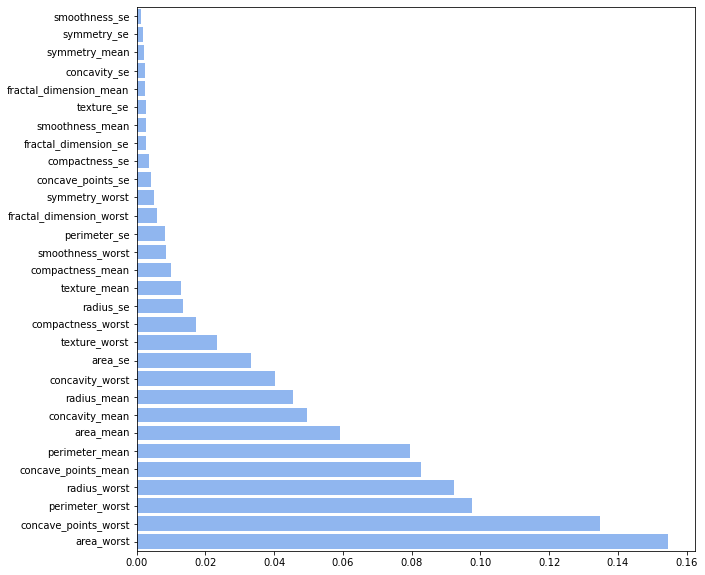

In [137]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=importance_ordered,y=FEATS, color="#80B3FF")